In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from meteostat import Point, Hourly
from datetime import datetime

# Let's take a look at the Collisions/crashes dataframe

Data downloaded from: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95 

In [2]:
# import data from data folder
df = pd.read_csv('data/Motor_Vehicle_Collisions_Crashes.csv')

In [3]:
df['HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour
df['MINUTE'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.minute
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['YEAR'] = df['CRASH DATE'].dt.year
df['MONTH'] = df['CRASH DATE'].dt.month
df['DAY'] = df['CRASH DATE'].dt.day

# drop data from 2023
df = df[df['YEAR'] < 2023]

# keep data from 2017-2022
#df = df[(df['YEAR'] >= 2017) & (df['YEAR'] <= 2022)]

In [4]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,MINUTE,YEAR,MONTH,DAY
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Sedan,Sedan,NaN,NaN,NaN,2,39,2021,9,11
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Sedan,NaN,NaN,NaN,NaN,11,45,2022,3,26
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Sedan,Pick-up Truck,NaN,NaN,NaN,6,55,2022,6,29
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Sedan,NaN,NaN,NaN,NaN,9,35,2021,9,11
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,8,13,2021,12,14


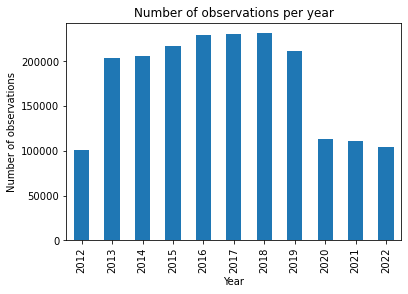

In [5]:
# get the number of observations per year
df['YEAR'].value_counts()

# plot the number of observations per year in sorted order
df['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of observations per year')
plt.xlabel('Year')
plt.ylabel('Number of observations')
plt.show()



In [6]:
# number of missing location values every year
df.groupby('YEAR')['BOROUGH','LATITUDE', 'LONGITUDE'].apply(lambda x: x.isnull().sum())


,BOROUGH,LATITUDE,LONGITUDE
YEAR,,,
2012,22969,15087,15087
2013,47761,31800,31800
2014,49685,33295,33295
2015,54231,34714,34714
2016,76527,37215,37215
2017,88053,13923,13923
2018,82330,15118,15118
2019,74462,17372,17372
2020,39228,8917,8917


In [7]:
# drop all rows where location is missing
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])


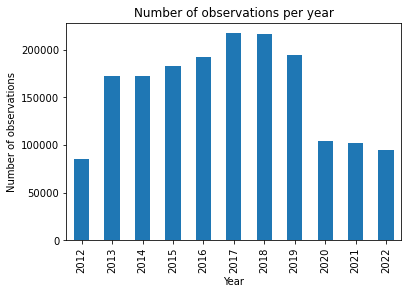

In [8]:
# get the number of observations per year
df['YEAR'].value_counts()

# plot the number of observations per year in sorted order
df['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of observations per year')
plt.xlabel('Year')
plt.ylabel('Number of observations')
plt.show()



In [9]:
# number of non-missing location values every year
df.groupby('YEAR')['BOROUGH','LATITUDE', 'LONGITUDE'].apply(lambda x: x.notnull().sum())


,BOROUGH,LATITUDE,LONGITUDE
YEAR,,,
2012,77575,85458,85458
2013,155973,171934,171934
2014,156344,172738,172738
2015,163453,182980,182980
2016,136902,192616,192616
2017,138519,217084,217084
2018,144807,216446,216446
2019,133092,194114,194114
2020,71634,103999,103999


In [10]:
# number of non-missing location values every year
df.groupby('YEAR')['ZIP CODE', 'BOROUGH','LATITUDE', 'LONGITUDE'].apply(lambda x: x.isnull().sum())


,ZIP CODE,BOROUGH,LATITUDE,LONGITUDE
YEAR,,,,
2012,7883,7883,0,0
2013,15961,15961,0,0
2014,16394,16394,0,0
2015,19549,19527,0,0
2016,55751,55714,0,0
2017,78611,78565,0,0
2018,71676,71639,0,0
2019,61065,61022,0,0
2020,32373,32365,0,0


In [11]:
len(df)

1733972

#### We can get the missing boroughs based on the location

**WARNING! The following code takes a long time to run!**

In [12]:
# Ideally we want to get the borough for each row where it is missing based on the location. 
# However, this takes a long time, so for part A of the assignment we choose to drop these rows instead. 

# this is the code to get the borough for each row where it is missing based on the location
'''
from geopy.geocoders import Nominatim
 
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
# get the zipcode/postcode for each row where it is missing
for index, row in df.iterrows():
    if pd.isnull(row['BOROUGH']):
        location = geolocator.reverse(str(row['LATITUDE'])+","+str(row['LONGITUDE']))
        address = location.raw['address']
        #df.loc[index, 'ZIP CODE'] = address.get('postcode')
        df.loc[index, 'BOROUGH'] = address.get('suburb')
'''

# This is the code to drop all rows where the borough is missing
df = df.dropna(subset=['BOROUGH'])

In [13]:
df.groupby('YEAR')['BOROUGH','LATITUDE', 'LONGITUDE'].apply(lambda x: x.isnull().sum())


,BOROUGH,LATITUDE,LONGITUDE
YEAR,,,
2012,0,0,0
2013,0,0,0
2014,0,0,0
2015,0,0,0
2016,0,0,0
2017,0,0,0
2018,0,0,0
2019,0,0,0
2020,0,0,0


In [14]:
# Latitude & Longitude input
#Latitude = "40.676937"
#Longitude = "-73.870400"
#location = geolocator.reverse(Latitude+","+Longitude)
#address = location.raw['address']
# traverse the data
#zipcode = address.get('postcode')
#borough = address.get('suburb')
#print('Zip Code : ', zipcode)
#print('borough : ', borough)



### Let's import weather data for each borough in NY on an hourly basis

The latitude and longitude for the 5 boroughs is taken from this: https://www.latlong.net/category/boroughs-236-100.html   

Brooklyn: 40.650002, -73.949997   
Bronx: 40.837048, -73.865433  
Manhatten: 40.776676, -73.971321  
Queens: 40.742054, -73.769417  
Staten island: 40.579021, -74.151535     

In [15]:
boroughs = ['BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

# create a list with the latitude and longitude of the boroughs
lat = [40.650002, 40.837048, 40.776676, 40.742054, 40.579021]
lon = [-73.949997, -73.865433, -73.971321, -73.769417, -74.151535]

In [16]:
# For each borough, get the hourly weather data using meteostat
start = datetime(2012, 1, 1)
end = datetime(2023, 12, 31)
for i in range(len(boroughs)):
    borough = boroughs[i]
    lat_borough = lat[i]
    lon_borough = lon[i]

    # Create Point for the borough 
    location = Point(lat_borough, lon_borough)

    # get the hourly weather data for the borough
    hourly = Hourly(location, start, end)
    # get the data as a dataframe
    df_hourly = hourly.fetch()
    # save the data as a csv file
    df_hourly.to_csv('data/hourly_weather_' + borough + '.csv')

In [17]:
weather_bronx = pd.read_csv('data/hourly_weather_BRONX.csv')
weather_brooklyn = pd.read_csv('data/hourly_weather_BROOKLYN.csv')
weather_manhattan = pd.read_csv('data/hourly_weather_MANHATTAN.csv')
weather_queens = pd.read_csv('data/hourly_weather_QUEENS.csv')
weather_staten_island = pd.read_csv('data/hourly_weather_STATEN ISLAND.csv')

# create a year and hour column for each of the dataframes
weather_bronx['YEAR'] = pd.to_datetime(weather_bronx['time']).dt.year
weather_bronx['MONTH'] = pd.to_datetime(weather_bronx['time']).dt.month
weather_bronx['DAY'] = pd.to_datetime(weather_bronx['time']).dt.day
weather_bronx['HOUR'] = pd.to_datetime(weather_bronx['time']).dt.hour
weather_bronx['BOROUGH'] = 'BRONX'

weather_brooklyn['YEAR'] = pd.to_datetime(weather_brooklyn['time']).dt.year
weather_brooklyn['MONTH'] = pd.to_datetime(weather_brooklyn['time']).dt.month
weather_brooklyn['DAY'] = pd.to_datetime(weather_brooklyn['time']).dt.day
weather_brooklyn['HOUR'] = pd.to_datetime(weather_brooklyn['time']).dt.hour
weather_brooklyn['BOROUGH'] = 'BROOKLYN'

weather_manhattan['YEAR'] = pd.to_datetime(weather_manhattan['time']).dt.year
weather_manhattan['MONTH'] = pd.to_datetime(weather_manhattan['time']).dt.month
weather_manhattan['DAY'] = pd.to_datetime(weather_manhattan['time']).dt.day
weather_manhattan['HOUR'] = pd.to_datetime(weather_manhattan['time']).dt.hour
weather_manhattan['BOROUGH'] = 'MANHATTAN'

weather_queens['YEAR'] = pd.to_datetime(weather_queens['time']).dt.year
weather_queens['MONTH'] = pd.to_datetime(weather_queens['time']).dt.month
weather_queens['DAY'] = pd.to_datetime(weather_queens['time']).dt.day
weather_queens['HOUR'] = pd.to_datetime(weather_queens['time']).dt.hour
weather_queens['BOROUGH'] = 'QUEENS'

weather_staten_island['YEAR'] = pd.to_datetime(weather_staten_island['time']).dt.year
weather_staten_island['MONTH'] = pd.to_datetime(weather_staten_island['time']).dt.month
weather_staten_island['DAY'] = pd.to_datetime(weather_staten_island['time']).dt.day
weather_staten_island['HOUR'] = pd.to_datetime(weather_staten_island['time']).dt.hour
weather_staten_island['BOROUGH'] = 'STATEN ISLAND'

In [18]:
# stack the dataframes on top of each other
weather = pd.concat([weather_bronx, weather_brooklyn, weather_manhattan, weather_queens, weather_staten_island], axis=0)

### We can now merge the weather data with the collisions/crashes dataframe

** We are going to merge based on the borough, year and hour of the day

In [19]:
weather.head(3)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,YEAR,MONTH,DAY,HOUR,BOROUGH
0,2012-01-01 00:00:00,10.0,2.8,61.0,NaN,NaN,260.0,14.8,NaN,1013.8,NaN,NaN,2012,1,1,0,BRONX
1,2012-01-01 01:00:00,8.9,2.2,63.0,0.0,NaN,280.0,9.4,NaN,1014.1,NaN,NaN,2012,1,1,1,BRONX
2,2012-01-01 02:00:00,8.9,2.2,63.0,0.0,NaN,270.0,14.8,NaN,1014.5,NaN,NaN,2012,1,1,2,BRONX


In [20]:
df.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,MINUTE,YEAR,MONTH,DAY
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,Sedan,NaN,NaN,NaN,NaN,9,35,2021,9,11
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,8,13,2021,12,14
7,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Sedan,Sedan,NaN,NaN,NaN,8,17,2021,12,14


In [21]:
# Merge the weather data with the collision data
df2 = df.merge(weather, how='left', left_on=['BOROUGH','YEAR','MONTH','DAY','HOUR'], right_on=['BOROUGH','YEAR','MONTH','DAY','HOUR'])
df2.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,9.9,69.0,0.0,NaN,0.0,0.0,NaN,1020.3,NaN,1.0
1,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,-7.3,39.0,0.0,NaN,240.0,11.2,NaN,1026.2,NaN,1.0
2,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,-8.6,32.0,0.0,NaN,282.0,13.0,NaN,1027.0,NaN,1.0


In [22]:
# save the data as a csv file
df2.to_csv('data/collision_weather.csv')

# Let's look at the Traffic volume dataset

Data downloaded from: https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt 

**Dette dataset er umiddelbart meget mangelfyldt, så jeg tænker lidt, at vi måske skal finde et andet.**
**Det kan sagtens være data over noget helt andet, hvis det kunne være spændende for vores analyse** 

In [24]:
# import data from data folder
df_traffic = pd.read_csv('data/Automated_Traffic_Volume_Counts.csv')

In [25]:
# get the number of observations per year
df_traffic['Yr'].value_counts()

2014    3708367
2016    3362243
2015    3232005
2017    3013530
2013    2829656
2019    2534113
2012    2434583
2018    2046443
2010    1421397
2011    1238391
2009    1012766
2020     409728
2021      86592
2008      68591
2007      11780
2000       1904
2022       1728
2006        664
Name: Yr, dtype: int64

In [26]:
# only keep data from 2012 to 2022
df_traffic = df_traffic[df_traffic['Yr'] >= 2012]

In [27]:
# Save the data as a new csv file
df_traffic.to_csv('data/Automated_Traffic_Volume_Counts_2012_2022.csv', index=False)


In [35]:
# import data from data folder
df_traffic_volume = pd.read_csv('data/Automated_Traffic_Volume_Counts_2012_2022.csv')

In [36]:
df_traffic_volume.columns

Index(['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID',
       'WktGeom', 'street', 'fromSt', 'toSt', 'Direction'],
      dtype='object')

In [37]:
df_traffic_volume.head(3)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,6798,Staten Island,2012,1,9,14,30,44,1421,POINT (923574.9 134137.8),BLOOMINGDALE ROAD,RAMONA AVENUE,SONIA COURT,NB
1,6798,Staten Island,2012,1,9,14,45,84,1421,POINT (923574.9 134137.8),BLOOMINGDALE ROAD,RAMONA AVENUE,SONIA COURT,NB
2,6798,Staten Island,2012,1,9,15,0,111,1421,POINT (923574.9 134137.8),BLOOMINGDALE ROAD,RAMONA AVENUE,SONIA COURT,NB


** Ideelt set ville det være nice at få lat og lon, så man kunne få en mere præcis angivelse af traffic volume. Jeg har ikke fundet en måde at få fat i det på endnu. Til at starte med merger jeg derfor dataframes på boroughs igen. **

In [38]:
#from shapely import wkt
#import geopandas as gpd

# mislykkede forsøg på at skaffe lat og lon

#df_traffic_volume['Coordinates'] = df_traffic_volume['WktGeom'].apply(wkt.loads)
#df_traffic_volume = df_traffic_volume.set_geometry('Coordinates')
#df_traffic_volume = df_traffic_volume.set_crs('EPSG:4326')

#gdf = gpd.GeoDataFrame(df_traffic_volume, geometry='Coordinates')
#df_traffic_volume['lat'] = gdf.geometry.x
#df_traffic_volume['lon'] = gdf.geometry.y


In [39]:
# We need to convert the boro column to upper case letters
df_traffic_volume['Boro'] = df_traffic_volume['Boro'].str.upper()

In [40]:
df_traffic_volume.head(3)

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,6798,STATEN ISLAND,2012,1,9,14,30,44,1421,POINT (923574.9 134137.8),BLOOMINGDALE ROAD,RAMONA AVENUE,SONIA COURT,NB
1,6798,STATEN ISLAND,2012,1,9,14,45,84,1421,POINT (923574.9 134137.8),BLOOMINGDALE ROAD,RAMONA AVENUE,SONIA COURT,NB
2,6798,STATEN ISLAND,2012,1,9,15,0,111,1421,POINT (923574.9 134137.8),BLOOMINGDALE ROAD,RAMONA AVENUE,SONIA COURT,NB


In [41]:
# drop the columns that we do not need
df_traffic_volume = df_traffic_volume.drop(['RequestID','SegmentID','WktGeom', 'street','fromSt','toSt', 'Direction'], axis=1)

In [42]:
df_traffic_volume.head(3)

,Boro,Yr,M,D,HH,Vol
0,STATEN ISLAND,2012,1,9,14,44
1,STATEN ISLAND,2012,1,9,14,84
2,STATEN ISLAND,2012,1,9,15,111


Dette data set er generelt meget mangelfuldt. Der er mange dage, måneder osv. der ikke findes i data. Så måske vi skal finde noget andet at bruge.. 

## Jeg har problemer med at merge disse sammen :((

In [49]:
# we are now ready to merge so we can add the traffic volume to the collision data:
#df_final = df2.merge(df_traffic_volume, how='left', left_on=['BOROUGH','YEAR','MONTH','DAY','HOUR','MINUTE'], right_on=['Boro','Yr','M','D','HH','MM'])

# we are now ready to merge so we can add the traffic volume to the collision data:
df_final = df2.merge(df_traffic_volume_new, how='left', left_on=['BOROUGH','YEAR', 'MONTH', 'DAY'], right_on=['Boro','Yr','M', 'D'])

## SO now we have a dataframe with collisons/crashes + weather + traffic volume.